In [10]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path
%matplotlib qt

In [12]:
# Read a sitk image
def read_mhd(path):
    img_ct = sitk.ReadImage(path)
    #print('Image size: ', img_ct.GetSize())
    #print('Image spacing: ', img_ct.GetSpacing())
    #print('Image origin: ', img_ct.GetOrigin())
    
    # Convert sitk image to a numpy array
    arr_ct = sitk.GetArrayFromImage(img_ct)
    #print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')
    
    return arr_ct

nOfs = 71
nf = []
for i in range(1, nOfs+1):
    path = r"output/detector{}-Edep.mhd".format(i)
    nf.append(read_mhd(path))

sum_arr = nf[0]
for i in range(1, nOfs):
    sum_arr = sum_arr + nf[i]
    
image = sum_arr[:,:,0]
#image = (image/image.max())*(2**16)
plt.imshow(image, cmap='gray')
plt.xlabel("columns")
plt.ylabel("rows")
plt.title("Film response")
plt.colorbar()


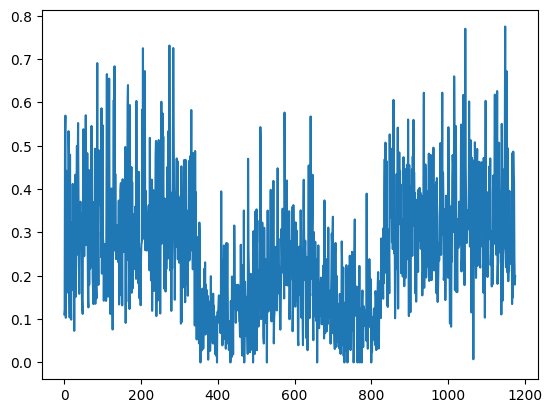

In [6]:
plt.plot(image[:,736])

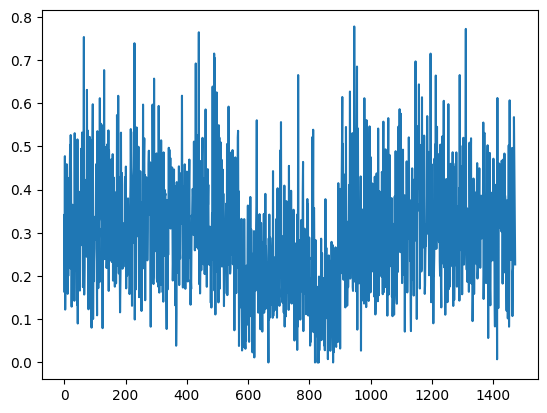

In [7]:
plt.plot(image[588,:])